# sklearn.svm: Support Vector Machines

* `svm.NuSVC([nu, kernel, degree, gamma, …])`: Nu-Support Vector Classification.
* `svm.SVC([C, kernel, degree, gamma, coef0, …])`: C-Support Vector Classification.
* `svm.LinearSVR([epsilon, tol, C, loss, …])`: Linear Support Vector Regression.

Other kernels were tested

In [2]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC, NuSVC, OneClassSVM, SVC, SVR, l1_min_c
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import gensim
import sys
sys.path.insert(0, '/home/mcunha/Documents/Classes/KW/G0B34a_knowledge_and_the_web/')
import data.ad_hominem.tokenize_df
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

#### Defining a function that will be used later...

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Just cleaned the data frame a bit

In [4]:
fallacies = pd.read_csv("../../data/ad_hominem/ad_hominems_cleaned_Murilo.csv")
fallacies = fallacies.drop(['Unnamed: 0'], axis=1)
fallacies = data.ad_hominem.tokenize_df.preprocess_df(fallacies)
fallacies['reddit_ad_hominem.body'].replace('', np.nan, inplace=True)
fallacies.dropna(subset=['reddit_ad_hominem.body'], inplace=True)
fallacies.reset_index()
train_data, test_data = train_test_split(fallacies, test_size=0.3, random_state=3)

fallacies.tail(n=10)

,reddit_ad_hominem.body,reddit_ad_hominem.ad_hominem
29277,we re gonna back him because we won know the d...,0
29278,gender,0
29279,which was alienating and confusing it makes yo...,0
29280,and the such my relationship was my baptize by...,0
29281,because that was label that other can understand,0
29282,it is more effective to report it than downvot...,0
29283,which was alienating and confusing it makes yo...,0
29284,because that was quot label that other,0
29285,times more iron fragments than asbestos,0
29286,ve never heard of supreme court rulings allowi...,0


#### I used the doc2vec from [here](/models/02_doc2vec/doc2vec.ipynb)

In [7]:
print("Loading doc2vec model...")
model = gensim.models.doc2vec.Doc2Vec.load("reddit-doc2vec.model")
print("Done!")

print("Preparing the train data...")
x_train = [gensim.utils.simple_preprocess(i) for i in train_data["reddit_ad_hominem.body"]] # Tokenize and remove stop words, make lower case, etc.
x_train = [model.infer_vector(i) for i in x_train]                                          # Infer vectors
y_train = list(train_data["reddit_ad_hominem.ad_hominem"])
print("Done!")

print("Preparing the test data...")
x_test = [gensim.utils.simple_preprocess(i) for i in test_data["reddit_ad_hominem.body"]] # Tokenize and remove stop words, make lower case, etc.
x_test = [model.infer_vector(i) for i in x_test]                                          # Infer vectors
y_test = list(test_data["reddit_ad_hominem.ad_hominem"])
print("Done!")

Loading doc2vec model...
Done!
Preparing the train data...
Done!
Preparing the test data...
Done!


## NuSVC
The kernels to be used are:
* `linear`
* `poly`
* `sigmoid`
* `rbf`

Fitting NuSVC model...
Done!
Confusion matrix, without normalization
[[3832 4247]
 [ 388  303]]
Normalized confusion matrix
[[0.47 0.53]
 [0.56 0.44]]
CPU times: user 4min 14s, sys: 694 ms, total: 4min 15s
Wall time: 28min


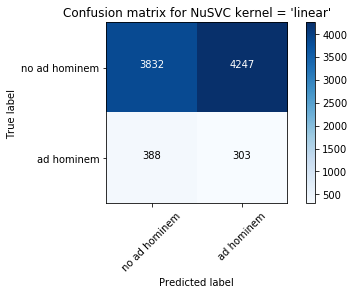

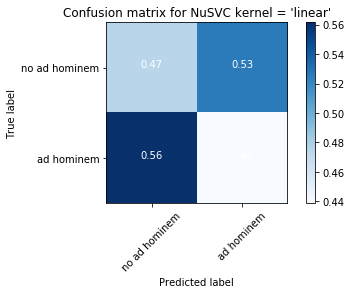

In [19]:
%%time

print("Fitting NuSVC model...")
nuModel = NuSVC(nu=0.05, kernel='linear').fit(x_train, y_train)
print("Done!")

predicted = nuModel.predict(x_test)

# Compute confusion matrix
nuModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + NuSVC.__name__ +  " kernel = 'linear'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

Fitting NuSVC model...
Done!
Confusion matrix, without normalization
[[  15 8064]
 [   1  690]]
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]
CPU times: user 45.3 s, sys: 570 ms, total: 45.8 s
Wall time: 47.1 s


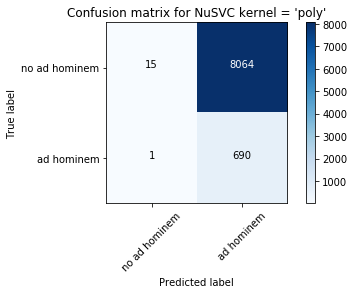

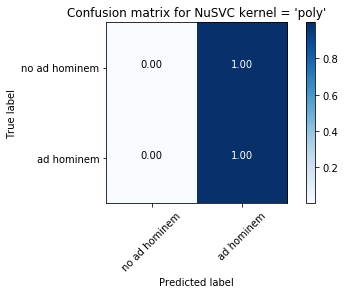

In [20]:
%%time

print("Fitting NuSVC model...")
nuModel = NuSVC(nu=0.05, kernel='poly').fit(x_train, y_train)
print("Done!")

predicted = nuModel.predict(x_test)

# Compute confusion matrix
nuModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + NuSVC.__name__ + " kernel = 'poly'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

Fitting NuSVC model...
Done!
Confusion matrix, without normalization
[[3950 4129]
 [ 417  274]]
Normalized confusion matrix
[[0.49 0.51]
 [0.6  0.4 ]]
CPU times: user 1min 3s, sys: 511 ms, total: 1min 3s
Wall time: 1min 4s


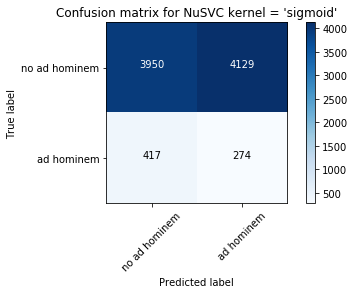

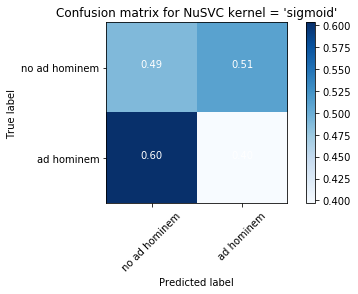

In [21]:
%%time

print("Fitting NuSVC model...")
nuModel = NuSVC(nu=0.05, kernel='sigmoid').fit(x_train, y_train)
print("Done!")

predicted = nuModel.predict(x_test)

# Compute confusion matrix
nuModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + NuSVC.__name__ + " kernel = 'sigmoid'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

Fitting NuSVC model...
Done!
Confusion matrix, without normalization
[[6758 1321]
 [ 337  354]]
Normalized confusion matrix
[[0.84 0.16]
 [0.49 0.51]]
CPU times: user 1min 23s, sys: 564 ms, total: 1min 23s
Wall time: 1min 23s


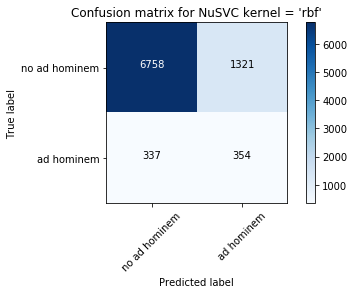

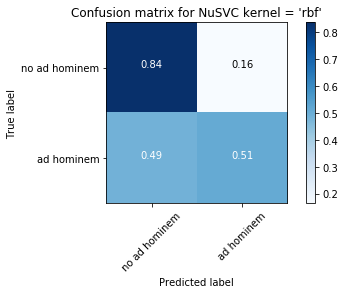

In [22]:
%%time

print("Fitting NuSVC model...")
nuModel = NuSVC(nu=0.05, kernel='rbf').fit(x_train, y_train)
print("Done!")

predicted = nuModel.predict(x_test)

# Compute confusion matrix
nuModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + NuSVC.__name__ + " kernel = 'rbf'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

## SVC
Theoretically equivalent to other methods (LinearSVC and NuSVC), but uses different implementations.
* `LinearSVC` is equivalent to `SVC(kernel = 'linear')`
* From documentation: *`SVC` and `NuSVC` are similar methods, but accept slightly different sets of parameters and have different mathematical formulations (see section [Mathematical formulation](https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation))

The kernels to be used are:
* `poly`
* `sigmoid`
* `precomputed`
* `rbf`
* `linear`

The kernel `rbf` was used in the [SVMs.ipynb](./SVMs.ipynb). Here for comparison.

Fitting SVC model...
Done!
Confusion matrix, without normalization
[[6758 1321]
 [ 337  354]]
Normalized confusion matrix
[[0.84 0.16]
 [0.49 0.51]]
CPU times: user 2min 5s, sys: 565 ms, total: 2min 6s
Wall time: 2min 6s


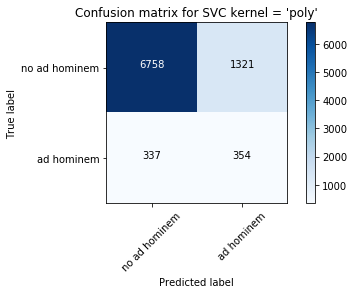

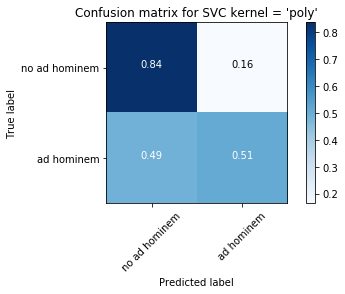

In [23]:
%%time

print("Fitting SVC model...")
svcModel = SVC(kernel='poly').fit(x_train, y_train)
print("Done!")

predicted = svcModel.predict(x_test)

# Compute confusion matrix
svcModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + SVC.__name__ + " kernel = 'poly'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

Fitting SVC model...
Done!
Confusion matrix, without normalization
[[6758 1321]
 [ 337  354]]
Normalized confusion matrix
[[0.84 0.16]
 [0.49 0.51]]
CPU times: user 2min 30s, sys: 580 ms, total: 2min 31s
Wall time: 2min 31s


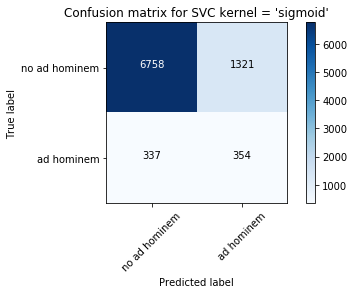

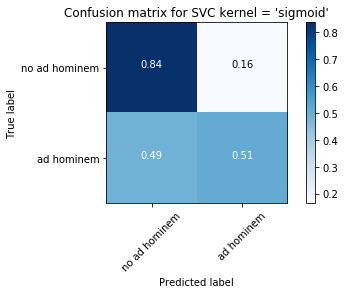

In [24]:
%%time

print("Fitting SVC model...")
svcModel = SVC(kernel='sigmoid').fit(x_train, y_train)
print("Done!")

predicted = svcModel.predict(x_test)

# Compute confusion matrix
svcModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + SVC.__name__ + " kernel = 'sigmoid'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

Fitting SVC model...
Done!
Confusion matrix, without normalization
[[6758 1321]
 [ 337  354]]
Normalized confusion matrix
[[0.84 0.16]
 [0.49 0.51]]
CPU times: user 2min 54s, sys: 707 ms, total: 2min 55s
Wall time: 2min 56s


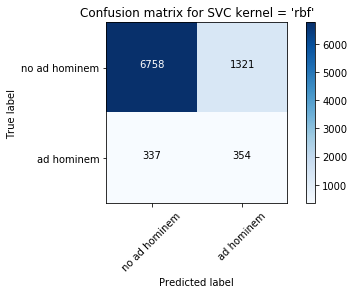

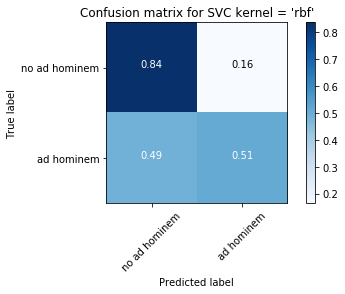

In [25]:
%%time

print("Fitting SVC model...")
svcModel = SVC(kernel='rbf').fit(x_train, y_train)
print("Done!")

predicted = svcModel.predict(x_test)

# Compute confusion matrix
svcModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + SVC.__name__ + " kernel = 'rbf'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

Fitting SVC model...
Done!
Confusion matrix, without normalization
[[6758 1321]
 [ 337  354]]
Normalized confusion matrix
[[0.84 0.16]
 [0.49 0.51]]
CPU times: user 8min 8s, sys: 804 ms, total: 8min 9s
Wall time: 8min 10s


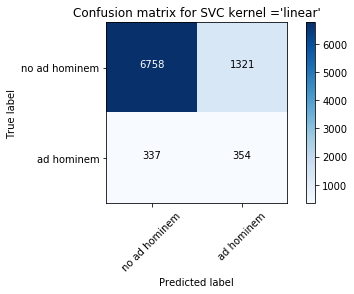

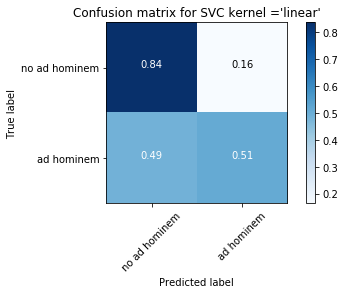

In [26]:
%%time

print("Fitting SVC model...")
svcModel = SVC(kernel='linear').fit(x_train, y_train)
print("Done!")

predicted = svcModel.predict(x_test)

# Compute confusion matrix
svcModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + SVC.__name__ + " kernel ='linear'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

## LinearSVC
As seen before, it is equivalent to `SVC(kernel='linear'`, with implementation differences. Here for comparison

Fitting linear model...
Done!
Confusion matrix, without normalization
[[8036   43]
 [ 660   31]]
Normalized confusion matrix
[[0.99 0.01]
 [0.96 0.04]]
CPU times: user 53.5 s, sys: 439 ms, total: 53.9 s
Wall time: 53.8 s


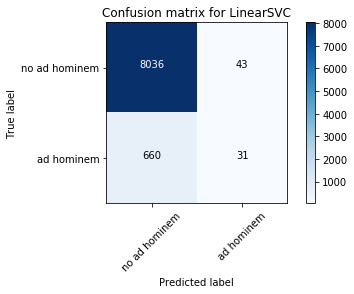

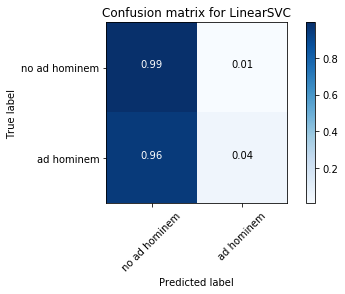

In [27]:
%%time

print("Fitting linear model...")
linearModel = LinearSVC().fit(x_train, y_train)
print("Done!")

predicted = linearModel.predict(x_test)

# Compute confusion matrix
linearModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + LinearSVC.__name__

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(linearModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(linearModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)